# <span class="evidance">파이토치(Pytorch)</span>

파이토치는 기본적인 수학 연산 라이브러리와 딥러닝에 필요한 그래프 형태 계산 방식을 추가한 라이브러리<br>

기본 연산 단위로 __텐서(tensor)__ 를 사용합니다

In [1]:
import torch

# 1. 텐서
__텐서(Tensor)__ 는 파이토치에서 사용되는 가장 기본적인 자료구조  
벡터, 행렬을 일반화한 개념을 배열과 같은 모양을 가지고 있음  
따라서, __랭크(rank)또는 차원__ 이라는 개념이 존재함
- 랭크 0 : 스칼라(Sclar)
- 랭크 1 : 벡터(Vector)
- 랭크 2 : 행렬(Matrix)
- 랭크 3이상(n 랭크) : n차원 행렬  
---
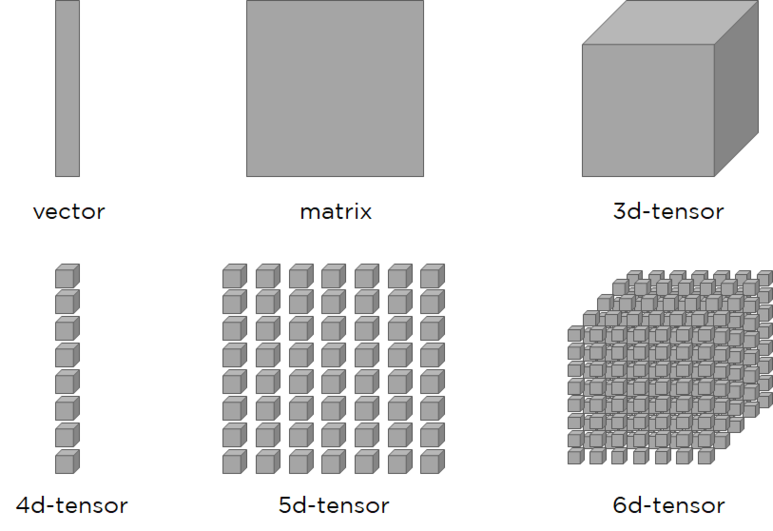

### 1.1 텐서 만들기와 텐서 모양 확인

>__1. tensor.size()__<br>
 = 텐서의 구체적인 형태를 반환한다.(function)<br>
__2. tensor.shape__<br>
 = 텐서의 구체적인 형태를 반환한다.(attribute)<br>
__3. tensor.ndimension()__<br>
 = 텐서의 차원(랭크)를 확인한다. 

In [8]:
#matrix만들기
x = torch.tensor([[1,2,3], 
                  [4,5,6], 
                  [7,8,9]])
print(x)
print(f'\nx.size() : {x.size()}')
print(f'x.shape : {x.shape}')
print(f'x.ndimension() : {x.ndimension()}')

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

x.size() : torch.Size([3, 3])
x.shape : torch.Size([3, 3])
x.ndimension() : 2


### 1.2. 텐서 모양 바꾸기
>__1. torch.unsqueeze(x, i=None)__<br>
 = x 텐서의 i번째 차원에 1차원을 추가한다.<br><br>
__2. torch.squeeze(x, i=None)__<br>
 = x 텐서의 i번째 차원에 1차원을 줄인다.<br><br>
__3. tensor.view(list(tuple))__<br>
 = 텐서의 shape를 list와 같이 변경한다. 
 >- 위 3가지 중 가장 많이 사용하는 함수
 >- 원래 텐서의 원소수와 변환 후 텐서의 원소수가 같아야 함

In [10]:
#unsqueeze를 이용해 차원 늘리기
x = torch.unsqueeze(x, 0)
print(x)
print(f'\nx.size() : {x.size()}')
print(f'x.shape : {x.shape}')
print(f'x.ndimension() : {x.ndimension()}')

tensor([[[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]])

x.size() : torch.Size([1, 1, 3, 3])
x.shape : torch.Size([1, 1, 3, 3])
x.ndimension() : 4


In [12]:
#squeeze를 이용해 차원 줄이기
x = torch.squeeze(x)
print(x)
print(f'\nx.size() : {x.size()}')
print(f'x.shape : {x.shape}')
print(f'x.ndimension() : {x.ndimension()}')

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

x.size() : torch.Size([3, 3])
x.shape : torch.Size([3, 3])
x.ndimension() : 2


In [16]:
#view()를 이용해 shape 바꾸기
x = x.view(9)
print(x)
print(f'\nx.size() : {x.size()}')
print(f'x.shape : {x.shape}')
print(f'x.ndimension() : {x.ndimension()}')

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

x.size() : torch.Size([9])
x.shape : torch.Size([9])
x.ndimension() : 1


In [17]:
#오류 case : 바꾸기 전 원소수와 바꾼 후의 원소 개수가 다른 경우
try:
    x = x.view(2,4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


---

# 2. 텐서를 이용한 연산과 행렬곱

기본적으로 __행렬과 행렬곱__ 개념은 많이 사용되는 연산이고 딥러닝의 기본이 되는 연산이기 때문에 꼭 알고 가도록 합시다.<br>
__행렬곱__<br>
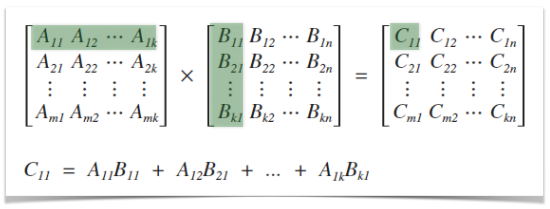
> - 두 2차원 행렬 A, B<br>
> - 행렬 A의 행과 B의 열의 길이는 같아야 함<br>
> - 행렬곱 A\*B의 결과 행렬의 행 개수는 A와 같고, 열개수는 B와 같음

행렬곱을 수행하기 앞서 텐서를 만드는 몇가지 방법을 소개하고자 합니다.<br>
>__1. torch.tensor(list)__<br>
> = list에 명시된 값과 모양으로 텐서를 만들어주는 방법으로 가장 기초적인 방법입니다.<br><br>
>__2. torch.full(shape*, value)__<br>
> = shape의 모양으로 텐서를 만들며 value의 값으로 가득찬 텐서가 만들어 집니다. <br><br>
>__3. torch.randn(shape*,dtype)__<br>
> = shape의 모양으로 텐서를 만들며, dtype에 맞게 랜덤하게 값들을 만들어 줍니다. <br>
>- ___dtype은 torch.float와 같이 torch형태의 dtype이라는 것을 명시해주자!!!___

In [21]:
#torch.tensor(list)로 텐서 만들기
x = torch.tensor([[4,8,6], [1,2,3], [4,5,6]])
print(f'x = torch.tensor([[4,8,6], [1,2,3], [4,5,6]])\n{x}')

x = torch.tensor([[4,8,6], [1,2,3], [4,5,6]])
tensor([[4, 8, 6],
        [1, 2, 3],
        [4, 5, 6]])


In [26]:
#torch.full(shape*, value)로 텐서 만들기
x = torch.full((3, 2), 42)
print(f'x = torch.full((3, 2), 42) ]\n{x}')

x = torch.full((3, 2), 42) ]
tensor([[42, 42],
        [42, 42],
        [42, 42]])


In [27]:
#torch.randn(shape*, dtype)으로 텐서 만들기
x = torch.randn(5,3, dtype=torch.float)
print(f'x = torch.randn(5,3, dtype=torch.float)\n{x}')

x = torch.randn(5,3, dtype=torch.float)
tensor([[-1.3103,  0.5374,  0.6847],
        [ 1.0397,  1.4359, -0.8366],
        [ 0.0655,  0.1989,  0.1452],
        [ 0.0269, -1.4162,  0.3510],
        [ 0.1500,  0.0063,  2.1442]])


이제 기본적인 텐서 만드는 방법을 확인했으니, 행렬곱 연산을 수행해볼 차례입니다<br>
행렬 w와 행렬 x를 만들어 보도록 합시다<br>
>1. w : 5x3 shpae의 정규분포로 뽑아진 float 타입의 난수를 원소로 가지는 텐서
>2. x : 직접 float 원소를 넣어 3x3 shpae으로 만들어진 텐서
>3. b : 행렬곱에도 다른 행렬 연산에 쓰일 텐서 b

구하고자 하는 값은 다음과 같은 식으로 표현됩니다.<br>
__$$ result = wx + b $$__

In [29]:
#텐서 만드는 작업
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0],
                 [3.0, 4.0],
                 [5.0, 6.0]])
b = torch.randn(5, 2, dtype=torch.float)

In [30]:
#행렬곱 연산
wx = torch.mm(w,x)
print(f'wx : {wx}')

wx : tensor([[ -6.7406,  -8.0701],
        [-10.3870, -14.4063],
        [  0.6392,   1.6774],
        [  6.7554,   8.5693],
        [ 13.0951,  15.5753]])


In [32]:
#행렬 더하기 연산
result = wx+b
print(f'wx+b : {result}')

wx+b : tensor([[ -6.2144,  -8.0690],
        [ -8.7704, -15.5640],
        [ -0.2490,   4.0782],
        [  5.5661,   8.9638],
        [ 13.6859,  16.3041]])


---
# 3. AutoGrad
AutoGrad는 자동으로 기울기를 계산해주는 텐서의 기능입니다.<br>
딥러닝에서 기울기는 가장 중요한 개념입니다.<br>
>1. 딥러닝 모델은 정답와 에측한 결과를 비교합니다.
>2. 이때, 정답과 예측의 차이를 산술적으로 표현한 것을 __거리(distance)__ 라고 하며, 학습데이터로 계산한 거리들의 평균을 __오차(loss)__ 라고 합니다.
>3. 이 오차를 최소화 하는 것이 딥러닝 모델 학습의 궁극적인 목표입니다.
- 오차를 최소화 하는 데에 여러 알고리즘이 존재합니다.
- 그중 가장 기본적인 알고리즘은 __경사하강법(gradient descent)__ 입니다<br><br>
__경사하강법__
> 오차를 수학 함수로 표현한 후 미분하여 함수의 기울기를 구해 오차의 최솟값이 있는 방향을 찾아내는 알고리즘
> 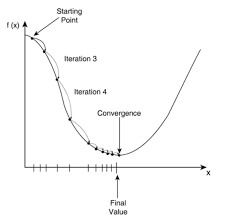<br>
실제로 위의 가장 오차가 낮은 지점은 기울기가 0이며 그 외의 영역들은 모두 기울기가 0인 지점을 향해 음수 값을 가지고 있습니다.<br>
최저점을 찾기 위해서는 반복적으로 기울기를 계산해보며 기울기가 0으로 수렴하도록 만들어주어야 합니다<br>
그러나 이를 일일이 계산하기에는 너무 힘듭니다.<br>
__AutoGrad 를 통해 자동으로 계산하면 됩니다.__

이제 경사하강법을 구현해보면서 __AutoGrad__ 기능을 사용해 보도록 하겠습니다.<br>
w의 __requires_grad를 True로 설정하면__ , 파이토치의 autograd 기능이 활성화 됩니다. <br>
autograd는 w에 대한 연산이 이루어 질 때 마다, w에 대한 미분값을 __w.grad__ 에 저장하게 됩니다.

In [36]:
w = torch.tensor(1.0, requires_grad=True)

w에 3을 곱하여 텐서 a에 저장하도록 하겠습니다.

In [37]:
a = w*3

좀더 복잡한 연산으로 l에는 a의 제곱을 저장해보도록 하겠습니다.

In [38]:
l = a**2

위 과정들을 수식으로 표현하면 다음과 같습니다.
$$ l = a^{2} = (3w)^{2} = 9w^2 $$
이제 최종 결과물인 l을 w로 미분하려면 연쇄법칙(chain rule)을 이용하여 a와 w로 차례대로 미분 해야합니다.<br>
과정은 복잡하나 autograd 기능을 이용해 자동으로 미분을 계산할 수 있습니다.<br><br>

__backward() 함수를 이용해 봅시다.__

In [39]:
l.backward()
print(f'l을 w로 미분한 값은 : {w.grad}')

l을 w로 미분한 값은 : 18.0


---
# 3.a 경사하강법을 이용해 이미지를 복원하기!

이제 우리는 AutoGrad기능을 __requires_grad=True__ 라는 설정과 __backward()__ 를 통해 사용할 수 있다는 것을 알았습니다!!!<br>

실습해볼 상황을 정의해보도록 하겠습니다.<br>
>1. 이미지 처리를 위해 weird_function()이라는 함수를 만들어 두었습니다.
>2. 그런데 함수에 버그가 생겨 100x100 의 오염된 이미지 파일만 만들어 졌습니다.
>3. 우리는 원본이 없습니다....다행히도 weird_function()의 소스코드는 남아있습니다!!
>4. 오염된 이미지와 원본이미지를 오염시켜버린 weird_function()을 이용해 원본 이미지를 만들어 보도록 합시다.<br><br>
_본 프로젝트는 NYU 머신러닝 개론 수업의 조경현 교수님의 수업을 참고 하였습니다._

수학적인 접근이라면 다음과 같은 방법을 생각해 볼 수 있습니다.
> 1. weird_function()의 함수를 분석한다.
> 2. 분석을 토대로 weird_function()의 반대동작을 하는 함수를 구현한다
> 3.2의 함수를 이용해 오염된 이미지를 복원한다.<br>

그러나 우리는 보다 머신러닝스러운 방법으로 접근해보도록 합신다.
> 1. 랜덤 텐서를 만들어 weired_function()을 통과시킵니다.
> 2. 1의 결과로 오염된 이미지를 얻을 수 있습니다. 이를 가설(hyphothesis)라고 부릅시다.
> 3. 가설과 오염된 이미지가 같다면, 랜덤텐서와 원본 이미지도 같을 것입니다.
> 4. 가설과 오염된 이미지의 오차를 계산하며 경사하강법으로 랜덤 텐서를 바꾸어 줍니다.
> 5. 가설과 오염된 이미지는 점점 같아질 것이며, 랜덤 텐서도 원본 이미지와 점점 같이질 것 입니다!!

___본 프로젝트를 위해 사용하는 라이브러리는 다음과 같습니다.___
1. torch
    = 파이토치 라이브러리
2. pickle
    = 오염된 이미지 파일을 로드하기 위해 필요한 라이브러리
3. matplotlib.pyplot
    = 이미지를 시각화 하기 위한 라이브러리

In [53]:
import torch
import pickle
import matplotlib.pyplot as plt

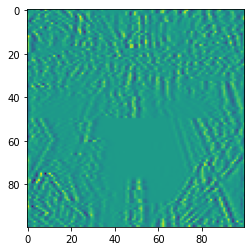

In [54]:
#손상된 이미지 파일(brkoen_image_t.p)를 불러와 텐서로 만들고 시각화 해보기
broken_img = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))
plt.imshow(broken_img.view(100,100))

이미지를 망가뜨린 함수 weird_function은 다음가 같이 구성되어 있습니다.<br>
복잡해보여도 걱정마세요 우리는 이 함수를 분석하지 않을 것 입니다.

In [55]:
#이미지를 손상시킨 weird_function()
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

다음으로는 무작위 텐서(random_tensor)를 weird_function()에 입력해 얻은 가설과<br>
오염된 이미지 사이의 오차를 구하는 함수를 구현해봅시다.<br>
오차는 두 텐서의 __거리(distance)를 구해 텐서에 저장하는 torch.dist__ 를 사용합니다.
>__torch.dist(x, y)__ <br>
두 텐서 x와 y의 원소를 비교하여 거리(norm)을 반환합니다.

In [70]:
#오차를 구하는 함수
def distance_loss(hypothesis, broken_img):
    return torch.dist(hypothesis, broken_img)

In [71]:
#오염된 이미지와 같은 모양의 random_tensor만들기
random_tensor = torch.randn(10000, dtype=torch.float )
print(random_tensor.shape)

torch.Size([10000])


경사하강법은 여러번 반복을 거치며 기울기를 점차 감소시켜 최적의 지점(Optimal)을 찾아내는 과정을 가집니다.<br>
최적지점으로 이동하는 속도는 학습률(learning rate)이라는 매개변수를 통해 조절하게 됩니다. <br>
>- 학습률이 너무 크면 오른쪽과 같이 수렴하지 못하고<br>
>- 학습률이 너무 작으면 왼쪽과 같이 수렴하는데 시간이 너무 많이 걸립니다.<br>
__따라서 학습률의 설정은 학습을 위해 매우 중요하며, 적절한 학습률은 경험적으로 얻어내야 합니다__
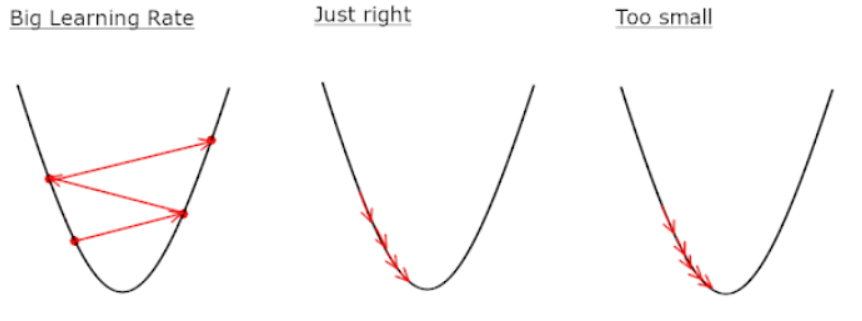

In [72]:
#학습률(lr) 설정
lr = 0.8

드디어 경사하강법을 적용할 준비가 끝났습니다.<br>
경사하강법을 이제 반복문을 통해 구현해보도록 하겠습니다.

In [73]:
for i in range(0,20000):
    #1. 먼저 기울기를 구해야 하니, random tensor의 requires_grad_ 설정을 해줍니다.
    random_tensor.requires_grad_(True)
    
    #2. 랜덤 텐서를 weird_function을 통과시켜 가설(hypothesis)를 구합니다.
    hypothesis = weird_function(random_tensor)
    
    #3. 만들어진 가설과 손상된 이미지 사이의 손실(loss)를 구해줍니다.
    loss = distance_loss(hypothesis, broken_img)
    
    #4. 손실을 random_tensor으로 미분합니다.
    loss.backward()
    
    #5. 구해진 미분값(기울기)를 통해 random_tesnor를 업데이트 해봅시다.
    with torch.no_grad(): # random_tensor의 업데이트 과정까지 기울기로 계산되는 것을 방지하기 위해 no_grad()를 설정합니다.
        """
        경사하강법은 아래와 같이
        업데이트 대상 = 업데이트 대상의 이전상태 - 학습률*기울기
        로 작동하는 알고리즘 입니다.
        """
        random_tensor = random_tensor - lr*random_tensor.grad
    
    #6. 중간중간 오차를 출력해봅시다 반복문이 1000번 돌 때 마다 출력합니다.
    if i%1000 == 0:
        print(f'{i}번째 반복에서 오차는 {loss.item()}입니다.')

0번째 반복에서 오차는 12.237808227539062입니다.
1000번째 반복에서 오차는 1.1502728462219238입니다.
2000번째 반복에서 오차는 0.5444650650024414입니다.
3000번째 반복에서 오차는 0.3772450089454651입니다.
4000번째 반복에서 오차는 0.29979243874549866입니다.
5000번째 반복에서 오차는 0.2524523437023163입니다.
6000번째 반복에서 오차는 0.2181345820426941입니다.
7000번째 반복에서 오차는 0.19065910577774048입니다.
8000번째 반복에서 오차는 0.1672825962305069입니다.
9000번째 반복에서 오차는 0.14656683802604675입니다.
10000번째 반복에서 오차는 0.12767070531845093입니다.
11000번째 반복에서 오차는 0.11006725579500198입니다.
12000번째 반복에서 오차는 0.09340931475162506입니다.
13000번째 반복에서 오차는 0.07746029645204544입니다.
14000번째 반복에서 오차는 0.06205489858984947입니다.
15000번째 반복에서 오차는 0.04707694426178932입니다.
16000번째 반복에서 오차는 0.03244518116116524입니다.
17000번째 반복에서 오차는 0.021133532747626305입니다.
18000번째 반복에서 오차는 0.021164927631616592입니다.
19000번째 반복에서 오차는 0.02116730436682701입니다.


이제 학습이 완료 되었습니다!<br>
이미지가 제대로 복원되었는지 확인해보도록 합시다!!

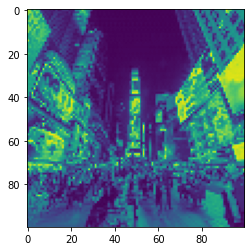

In [74]:
plt.imshow(random_tensor.view(100,100).data)

# 마치며
지금까지 배운내용
> __1. Torch의 기본 연산 단위인 Tensor를 만드는 방법__
>>1. torch.tensor(list)
>>2. torch.full(shape*, value)
>>3. torch.randn(shape*,dtype)

> __2. Tensor의 모양을 확인하고 조작하는 방법__<br>
> __텐서 모양 확인__
>>1. tensor.size()
>>2. tensor.shape
>>3. tensor.ndimension()

> __3. Tensor 모양 조작__
>>1. torch.unsqueeze(x, i=None)
>>2. torch.squeeze(x, i=None)
>>3. tensor.view(list(tuple))

>__4. Tensor 연산__
>> 1. torch.mm(x, y)
>> 2. tensor.requires_grad_()
>> 3. torch.no_grad()
>> 4. tesnor.dist(x, y)

이것으로 여러분들은 Pytorch의 Tensor를 사용하고 AutoGrad 기능까지 실습해보았습니다!<br>
앞으로는 오늘 배운 tensor연산에서 나아가, 복잡하고 정교한 계산을 다양한 pytorch의 함수들을 이용하며 딥러닝을 구현해보도록 하겠습니다.